Classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'

day	day of the week: 'mon' to 'sun'

FFMC	FFMC index from the FWI system: 18.7 to 96.20 	(Fine fuel moisture Code)

DMC	DMC index from the FWI system: 1.1 to 291.3	(Duff moisture code)

DC	DC index from the FWI system: 7.9 to 860.6	(drought code)

ISI	ISI index from the FWI system: 0.0 to 56.10	(initial spread index)

temp	temperature in Celsius degrees: 2.2 to 33.30

RH	relative humidity in %: 15.0 to 100

wind	wind speed in km/h: 0.40 to 9.40

rain	outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie 	the burned area of the forest ( Small , Large)


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## EDA

In [57]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [58]:
cols_to_keep = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area','size_category']
df= df[cols_to_keep]
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


<AxesSubplot:xlabel='size_category', ylabel='count'>

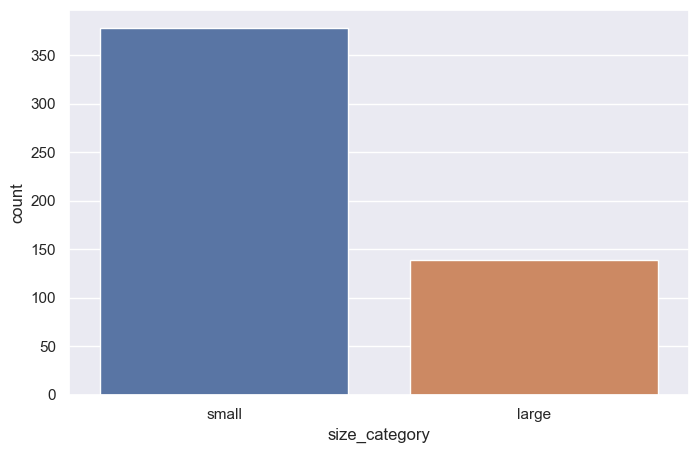

In [59]:
sns.set(rc={'figure.figsize': (8, 5), 'figure.dpi': 100})
sns.countplot(x=df['size_category'])

### Countplot for Month

<AxesSubplot:xlabel='month', ylabel='count'>

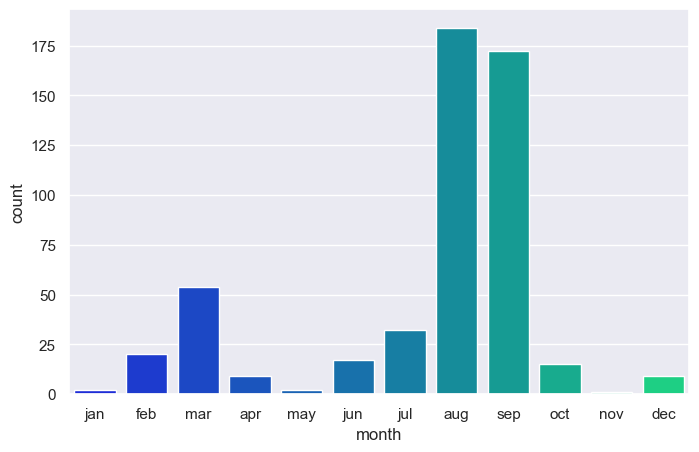

In [60]:
sns.countplot(x=df['month'], 
              order=['jan', 'feb', 'mar','apr','may','jun','jul','aug','sep', 'oct', 'nov','dec'], palette='winter')

### Countplot for Days

<AxesSubplot:xlabel='day', ylabel='count'>

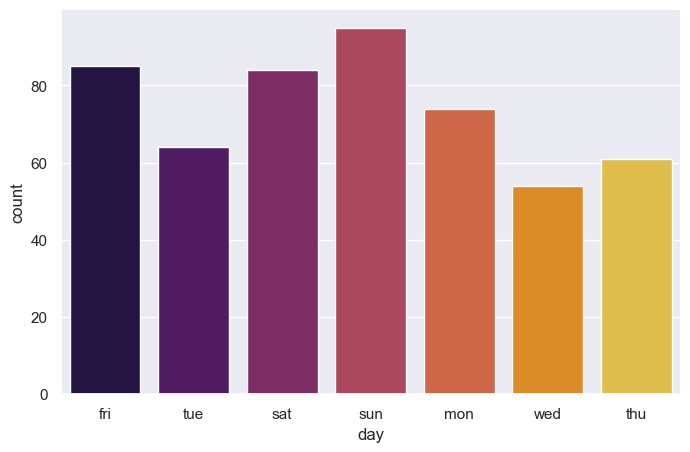

In [61]:
sns.countplot(x=df['day'], palette='inferno')

In [62]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [63]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [64]:
df.loc[:,'month'] = df.loc[:, 'month'].replace(['jan', 'feb', 'mar','apr','may','jun','jul','aug','sep', 'oct', 'nov','dec'], 
                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
df.loc[:, 'day'] = df.loc[:, 'day'].replace(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], [6, 3, 7, 1, 2, 4, 5])

df['size_category'].replace(('small', 'large'), (0, 1), inplace=True)

In [65]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


## Standardization

In [66]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
ss =StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.946441,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-0.454255,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,1.413339,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.946441,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,-1.388053,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,-1.388053,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,-1.388053,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,-1.388053,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,1.413339,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


## Splitting the model

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

## Model Building

In [68]:
svc = SVC()
svc.fit(xtrain, ytrain)
y_pred = svc.predict(xtest)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        75
           1       1.00      0.24      0.39        29

    accuracy                           0.79       104
   macro avg       0.89      0.62      0.63       104
weighted avg       0.84      0.79      0.74       104



In [70]:
print('Training Accuracy:', svc.score(xtrain, ytrain))
print('Testing Accuracy:', svc.score(xtest, ytest))

Training Accuracy: 0.8135593220338984
Testing Accuracy: 0.7884615384615384


## Hyper Parameter Tuning

In [71]:
params = {
    'kernel': ['rbf', 'poly', 'linear'],
    'C': [0.01, 0.1, 1, 2, 3, 4, 10, 20],
    'gamma': [0.001, 0.1, 1, 2, 3, 4, 12, 15]
}
gcv = GridSearchCV(SVC(), param_grid=params, verbose=0)

In [72]:
gcv.fit(xtrain, ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 4, 10, 20],
                         'gamma': [0.001, 0.1, 1, 2, 3, 4, 12, 15],
                         'kernel': ['rbf', 'poly', 'linear']})

In [73]:
print(f'{gcv.best_params_}\n{gcv.best_score_}')

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.9757272994416691


## Final Model

In [74]:
final_svc = SVC(kernel='linear', C=10, gamma=0.001)
final_svc.fit(xtrain, ytrain)
ypred = final_svc.predict(xtest)
ypred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [75]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        75
           1       1.00      0.79      0.88        29

    accuracy                           0.94       104
   macro avg       0.96      0.90      0.92       104
weighted avg       0.95      0.94      0.94       104



In [76]:
print('Training Accuracy:', final_svc.score(xtrain, ytrain))
print('Testing Accuracy:', final_svc.score(xtest, ytest))

Training Accuracy: 0.9806295399515739
Testing Accuracy: 0.9423076923076923
